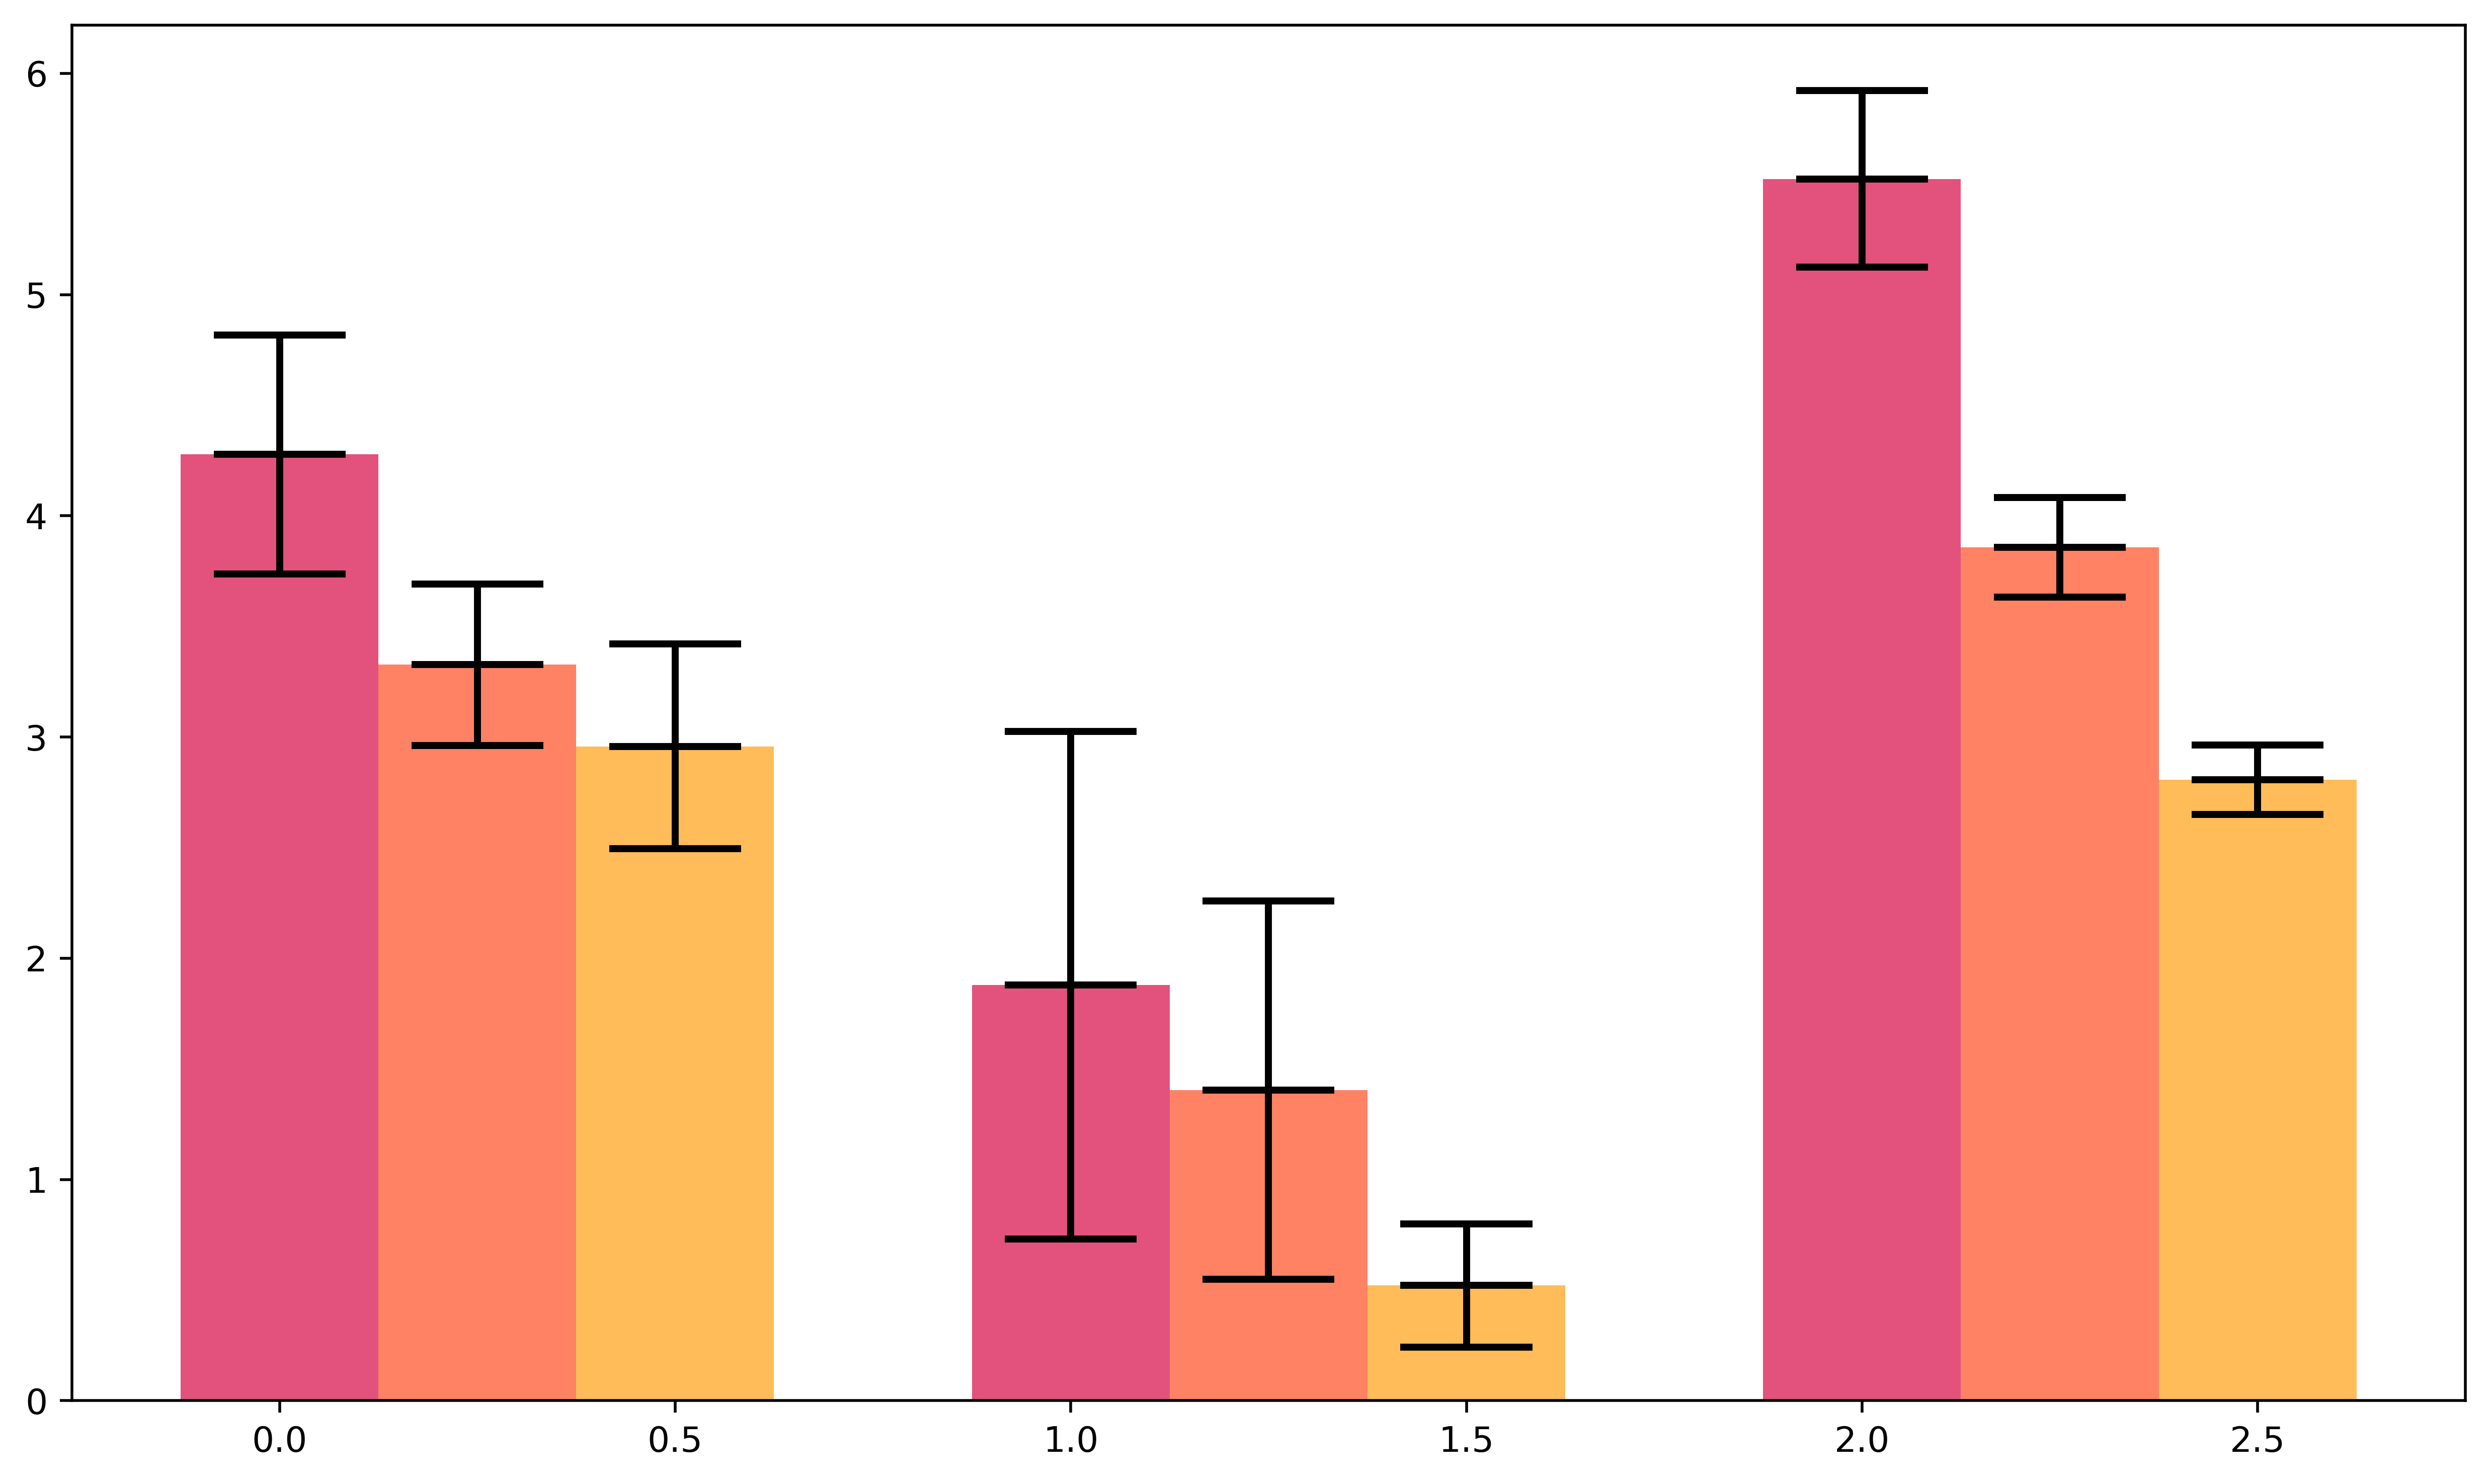

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def reproduce_plot_from_csv(csv_path, output_dir=None):
    df = pd.read_csv(csv_path)
    result_df = df.groupby('Dataset').agg(['mean', 'std']).reset_index()
    result_df.columns = ['_'.join(col).strip('_') for col in result_df.columns.values]
    
    groups = result_df['Dataset'].unique()
    metrics = ['RMSE', 'MAE', 'MAPE']
    colors = ['#e2527d', '#ff8265', '#ffbc58']
    
    plt.figure(figsize=(10, 6), dpi=500)
    x = np.arange(len(groups))
    width = 0.25
    
    for i, metric in enumerate(metrics):
        means = result_df[f'{metric}_mean']
        stds = result_df[f'{metric}_std']
        
        plt.bar(x + i*width, means, width, color=colors[i])
        
        for j in range(len(groups)):
            mean_val = means.iloc[j]
            std_val = stds.iloc[j]
            
            if not np.isnan(mean_val) and not np.isnan(std_val):
                plt.hlines(mean_val, 
                          x[j] + i*width - width/3, 
                          x[j] + i*width + width/3,
                          colors='black', linewidths=2, linestyles='-')
                
                plt.hlines(mean_val + std_val, 
                          x[j] + i*width - width/3, 
                          x[j] + i*width + width/3,
                          colors='black', linewidths=2, linestyles='-')
                
                plt.hlines(mean_val - std_val, 
                          x[j] + i*width - width/3, 
                          x[j] + i*width + width/3,
                          colors='black', linewidths=2, linestyles='-')
                
                plt.vlines(x[j] + i*width, 
                          mean_val - std_val, 
                          mean_val + std_val,
                          colors='black', linewidths=2)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    csv_path = r'D:\Gitload\PIMOE\Fig 3d\fig3d.csv'
    reproduce_plot_from_csv(csv_path)